In [ ]:
from keras.models import load_model ,Model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import VGG19, preprocess_input
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import pickle

%matplotlib inline

In [11]:
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)
print(len(tokenizer.word_index))

7276


In [12]:
# Generate caption from input feature
def generate_caption(model, tokenizer, img):
    # start sign
    generated = ['CLS']
    # Loop for max length or end sign('sep')
    max_length = 36
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([generated])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        # Predict next word
        y_pred = model.predict([img, sequence], verbose=0)
        y_pred = np.argmax(y_pred)

        word_pred = 'sep'
        for word ,i in tokenizer.word_index.items():
            if i == y_pred:
                word_pred = word
        
        # Generate sentence
        generated.append(word_pred)
        # If end sign, break
        if word_pred == 'sep':
            break
    return generated

In [14]:
def generate_example(final_model, img_path, tokenizer):
    base_model = VGG19()
    cnn_model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    feature = cnn_model.predict(img)
    
    model = load_model(final_model)
    caption = generate_caption(model, tokenizer, feature)
    caption.pop(0)
    caption.pop()
    return caption

In [15]:
def show_img(file):
    img = Image.open(file, 'r')
    imshow(np.asarray(img))

a white dog runs through the grass


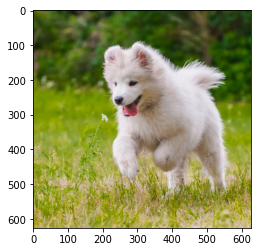

In [19]:
final_model_file = 'transfer.model.ep001.acc0.3872.h5'
img_file = 'image/example.jpg'

caption = generate_example( final_model_file, img_file, tokenizer)
caption = ' '.join(caption)
show_img(img_file)
print(caption)

a dog is standing in front of a young flower


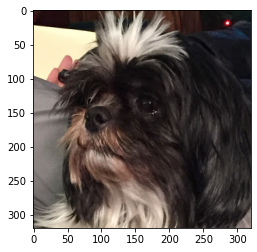

In [20]:
img_file = 'image/annie_dog.jpg'

caption = generate_example( final_model_file, img_file, tokenizer)
caption = ' '.join(caption)
show_img(img_file)
print(caption)

a baseball player in a young couple is running on runner


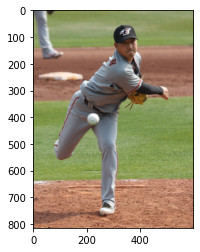

In [ ]:
img_file = 'image/baseball.jpg'

caption = generate_example( final_model_file, img_file, tokenizer)
caption = ' '.join(caption)
show_img(img_file)
print(caption)